### Analisis exploratorio

Instalar y cargar librarias

In [147]:
import numpy as np
import pandas as pd 
import sqlite3 as sql
import funciones as fn
import plotly.express as px
from unidecode import unidecode
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import pickle


Funciones

In [67]:
#Función para verificar los valores únicos de cada variable
def valores(x):
    for variable in list(x.columns[1:]):
        y = x[variable].unique()
        print(variable)
        print(y)

In [68]:
#Función para pasar nombres de variables en minúscula
def minust(x):
    x.columns = map(str.lower,x.columns)

In [69]:
#Función para convertir registros de una variable en minúscula
def minus(x):
    x=x.str.lower()
    return x

In [70]:
#Función para calcular cantidad y porcentaje de nulos por variable
def nulos(x):
    cant_nulos=x.isnull().sum() 
    porc_nulos=round(x.isnull().sum().sum()/x.size, 4)*100
    print('Cantidad de nulos por variable:') 
    print(cant_nulos)
    print('Porcentaje total de nulos: ', porc_nulos)

In [71]:
#Función para calcular precio promedio de un tipo de reclamación
def prom (x):
    precioprom=round((x['precio']/x['cantidad']), 0)

    return precioprom

Análisis exploratorio

In [72]:
#Realizar conexión de base de datos db_movies
conn=sql.connect('BD_insurance2019dataset.db')
cur=conn.cursor()

In [73]:
#Verificar las tablas existentes en db_movies
cur.execute("SELECT name FROM sqlite_master where type='table' ")
cur.fetchall()

[('reclamaciones',),
 ('diagnosticos',),
 ('regional',),
 ('genero',),
 ('sociodemograficas',),
 ('utilizaciones',),
 ('util_compl',),
 ('socio_compl',),
 ('compl',)]

In [74]:
#Ver nombre de tablas 
pd.read_sql_query("SELECT name FROM sqlite_master;",conn)

,name
0,reclamaciones
1,diagnosticos
2,regional
3,genero
4,sociodemograficas
5,utilizaciones
6,util_compl
7,socio_compl
8,compl


In [75]:
#Ver tabla reclamaciones
pd.read_sql_query("SELECT * FROM reclamaciones;",conn)

,Reclamacion_Id,Reclamacion_Desc
0,1,ATENCION DEL PARTO
1,2,ATENCION INTEGRAL DE SALUD MENTAL
2,3,CIRUGIA AMBULATORIA POR ACCIDENTE
3,4,CIRUGIA AMBULATORIA POR ENFERMEDAD
4,5,CIRUGIA AMBULATORIA POR ENFERMEDAD CONGENITA
5,6,COBERTURA PROGRAMA PALIATIVOS
6,7,CONCILIACION
7,8,CONSULTA DE URGENCIAS
8,9,CONSULTA EXTERNA
9,10,CONSULTAS PRENATALES


In [76]:
#Ver tabla diagnosticos
pd.read_sql_query("SELECT * FROM diagnosticos;",conn)

,Diagnostico_Codigo,Diagnostico_Desc
0,-1,Sin Información
1,0,DIAGNÓSTICO PENDIENTE
2,9,DIAGNÓSTICO PENDIENTE
3,A010,FIEBRE TIFOIDEA
4,A021,SEPTICEMIA DEBIDA A SALMONELLA
...,...,...
2719,Z961,PRESENCIA DE LENTES INTRAOCULARES
2720,Z966,PRESENCIA DE IMPLANTE ORTOPÉDICO ARTICULAR
2721,Z975,PRESENCIA DE DISPOSITIVO ANTICONCEPTIVO (INTRA...
2722,Z980,ESTADO DE DERIVACIÓN INTESTINAL O ANASTOMOSIS


In [77]:
#Ver tabla regional
pd.read_sql_query("SELECT * FROM regional;",conn)

,Regional_id,Regional_Desc
0,1,REGIONAL ANTIOQUIA
1,2,REGIONAL CENTRO
2,3,REGIONAL NORTE
3,4,REGIONAL OCCIDENTE
4,5,REGIONAL EJE CAFETERO
5,6,Sin Información


In [78]:
#Ver tabla genero
pd.read_sql_query("SELECT * FROM genero;",conn)

,Sexo_Cd,Sexo_desc
0,M,Masculino
1,F,Femenino
2,-1,Sin Informacion


In [79]:
#Ver tabla sociodemograficas
pd.read_sql_query("SELECT * FROM sociodemograficas;",conn)

,Afiliado_Id,Sexo_codigo,FechaNacimiento,Regional_codigo,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
0,738288,M,28072,1,0,0,0,0,0
1,738294,M,23392,2,0,0,0,0,0
2,738303,F,27177,3,0,0,0,0,0
3,738318,M,15053,2,1,0,1,1,0
4,738323,F,10447,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
218200,59559606,F,38164,2,0,0,0,0,0
218201,59564764,F,38429,2,0,0,0,0,0
218202,59565065,F,38425,2,0,0,0,0,0
218203,59570753,M,27839,4,0,0,0,0,0


In [80]:
#Ver tabla utilizaciones
pd.read_sql_query("SELECT * FROM utilizaciones;", conn)

,Fecha_Reclamacion,Afiliado_Id,Reclamacion_codigo,Diagnostico_Codigo,Cantidad,Precio
0,23/10/2019,22914637,12,M45X,1.0,1056639.96
1,26/11/2019,58412744,9,9,1.0,139772.80
2,23/10/2019,5070923,16,9,1.0,320166.76
3,27/11/2019,5769950,13,9,1.0,21204.00
4,8/11/2019,24022833,12,K589,1.0,60636.00
...,...,...,...,...,...,...
395863,14/11/2019,4351189,16,9,15.0,251820.44
395864,7/9/2019,44677250,9,9,1.0,67208.00
395865,25/10/2019,19220270,13,9,10.0,475726.00
395866,11/12/2019,25627716,12,9,2.0,568788.00


In [81]:
#Función para ejecutar archivo SQL
fn.ejecutar('Preprocesamientos.sql', cur)
cur.execute("select name from sqlite_master where type='table' ")
cur.fetchall()

[('reclamaciones',),
 ('diagnosticos',),
 ('regional',),
 ('genero',),
 ('sociodemograficas',),
 ('utilizaciones',),
 ('util_compl',),
 ('socio_compl',),
 ('compl',)]

In [82]:
#Tablar de utilizaciones con la descripción de los campos del tipo de diagnósitco y reclamación.
util_compl=pd.read_sql_query("SELECT * FROM util_compl;",conn)
util_compl

,Fecha_Reclamacion,Afiliado_Id,Diagnostico_Desc,Reclamacion_Desc,Cantidad,Precio
0,23/10/2019,22914637,ESPONDILITIS ANQUILOSANTE,EXAMENES DE DIAGNOSTICO,1.0,1056639.96
1,26/11/2019,58412744,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,1.0,139772.80
2,23/10/2019,5070923,DIAGNÓSTICO PENDIENTE,LABORATORIO CLINICO,1.0,320166.76
3,27/11/2019,5769950,DIAGNÓSTICO PENDIENTE,FISIOTERAPIA ILIMITADA,1.0,21204.00
4,8/11/2019,24022833,SÍNDROME DEL COLON IRRITABLE SIN DIARREA,EXAMENES DE DIAGNOSTICO,1.0,60636.00
...,...,...,...,...,...,...
395863,14/11/2019,4351189,DIAGNÓSTICO PENDIENTE,LABORATORIO CLINICO,15.0,251820.44
395864,7/9/2019,44677250,DIAGNÓSTICO PENDIENTE,CONSULTA EXTERNA,1.0,67208.00
395865,25/10/2019,19220270,DIAGNÓSTICO PENDIENTE,FISIOTERAPIA ILIMITADA,10.0,475726.00
395866,11/12/2019,25627716,DIAGNÓSTICO PENDIENTE,EXAMENES DE DIAGNOSTICO,2.0,568788.00


In [83]:
#Tablar de sociodemográficas con la descripción de los campos del sexo y regional
socio_compl=pd.read_sql_query("SELECT * FROM socio_compl;",conn)
socio_compl

,Afiliado_Id,Sexo_desc,FechaNacimiento,Regional_Desc,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
0,738288,Masculino,28072,REGIONAL ANTIOQUIA,0,0,0,0,0
1,738294,Masculino,23392,REGIONAL CENTRO,0,0,0,0,0
2,738303,Femenino,27177,REGIONAL NORTE,0,0,0,0,0
3,738318,Masculino,15053,REGIONAL CENTRO,1,0,1,1,0
4,738323,Femenino,10447,REGIONAL CENTRO,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
218200,59559606,Femenino,38164,REGIONAL CENTRO,0,0,0,0,0
218201,59564764,Femenino,38429,REGIONAL CENTRO,0,0,0,0,0
218202,59565065,Femenino,38425,REGIONAL CENTRO,0,0,0,0,0
218203,59570753,Masculino,27839,REGIONAL OCCIDENTE,0,0,0,0,0


In [84]:
#Tabla completa
compl=pd.read_sql_query("SELECT * FROM compl;",conn)
compl

,Afiliado_Id,Sexo_desc,FechaNacimiento,Regional_Desc,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Fecha_Reclamacion,Reclamacion_Desc,Diagnostico_Desc,Cantidad,Precio
0,22914637,Masculino,33345.0,REGIONAL EJE CAFETERO,0.0,0.0,0.0,0.0,0.0,23/10/2019,EXAMENES DE DIAGNOSTICO,ESPONDILITIS ANQUILOSANTE,1.0,1056639.96
1,58412744,Femenino,38101.0,REGIONAL CENTRO,0.0,0.0,0.0,0.0,0.0,26/11/2019,CONSULTA EXTERNA,DIAGNÓSTICO PENDIENTE,1.0,139772.80
2,5070923,Femenino,27154.0,REGIONAL CENTRO,0.0,0.0,0.0,0.0,0.0,23/10/2019,LABORATORIO CLINICO,DIAGNÓSTICO PENDIENTE,1.0,320166.76
3,5769950,Femenino,10482.0,REGIONAL CENTRO,0.0,0.0,0.0,0.0,0.0,27/11/2019,FISIOTERAPIA ILIMITADA,DIAGNÓSTICO PENDIENTE,1.0,21204.00
4,24022833,Masculino,33073.0,REGIONAL CENTRO,0.0,0.0,0.0,0.0,0.0,8/11/2019,EXAMENES DE DIAGNOSTICO,SÍNDROME DEL COLON IRRITABLE SIN DIARREA,1.0,60636.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395863,4351189,Femenino,18923.0,REGIONAL EJE CAFETERO,0.0,0.0,0.0,1.0,0.0,14/11/2019,LABORATORIO CLINICO,DIAGNÓSTICO PENDIENTE,15.0,251820.44
395864,44677250,Femenino,36247.0,REGIONAL ANTIOQUIA,0.0,0.0,0.0,0.0,0.0,7/9/2019,CONSULTA EXTERNA,DIAGNÓSTICO PENDIENTE,1.0,67208.00
395865,19220270,Femenino,29249.0,REGIONAL ANTIOQUIA,0.0,0.0,0.0,0.0,0.0,25/10/2019,FISIOTERAPIA ILIMITADA,DIAGNÓSTICO PENDIENTE,10.0,475726.00
395866,25627716,Femenino,29652.0,REGIONAL CENTRO,0.0,0.0,0.0,0.0,0.0,11/12/2019,EXAMENES DE DIAGNOSTICO,DIAGNÓSTICO PENDIENTE,2.0,568788.00


In [85]:
# Convertir las columna "FechaNacimiento" y "Fecha_Reclamacion" a formato de fecha
compl["FechaNacimiento"] = pd.to_datetime(compl["FechaNacimiento"], unit='d', origin='1899-12-30')
compl['Fecha_Reclamacion'] = pd.to_datetime(compl['Fecha_Reclamacion'])


C:\Users\Valentina\AppData\Local\Temp\ipykernel_59284\3097686667.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  compl['Fecha_Reclamacion'] = pd.to_datetime(compl['Fecha_Reclamacion'])


In [86]:
#Aplicar función para convertir títulos en minuscula
minust(compl)

In [87]:
compl.columns

Index(['afiliado_id', 'sexo_desc', 'fechanacimiento', 'regional_desc',
       'cancer', 'epoc', 'diabetes', 'hipertension', 'enf_cardiovascular',
       'fecha_reclamacion', 'reclamacion_desc', 'diagnostico_desc', 'cantidad',
       'precio'],
      dtype='object')

In [88]:
#Aplicar función para que los registros de las variables tipo string se han convertidos a minúsculas
compl['sexo_desc']=minus(compl['sexo_desc'])
compl['regional_desc']=minus(compl['regional_desc'])
compl['reclamacion_desc']=minus(compl['reclamacion_desc'])
compl['diagnostico_desc']=minus(compl['diagnostico_desc'])

In [89]:
compl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395868 entries, 0 to 395867
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   afiliado_id         395868 non-null  int64         
 1   sexo_desc           390992 non-null  object        
 2   fechanacimiento     390992 non-null  datetime64[ns]
 3   regional_desc       390992 non-null  object        
 4   cancer              390992 non-null  float64       
 5   epoc                390992 non-null  float64       
 6   diabetes            390992 non-null  float64       
 7   hipertension        390992 non-null  float64       
 8   enf_cardiovascular  390992 non-null  float64       
 9   fecha_reclamacion   395868 non-null  datetime64[ns]
 10  reclamacion_desc    395868 non-null  object        
 11  diagnostico_desc    395868 non-null  object        
 12  cantidad            395868 non-null  float64       
 13  precio              395868 no

In [90]:
compl.isnull().sum()

afiliado_id              0
sexo_desc             4876
fechanacimiento       4876
regional_desc         4876
cancer                4876
epoc                  4876
diabetes              4876
hipertension          4876
enf_cardiovascular    4876
fecha_reclamacion        0
reclamacion_desc         0
diagnostico_desc         0
cantidad                 0
precio                   0
dtype: int64

In [91]:
#Reemplazar valores "sin informacion" por nulos
compl['sexo_desc'] = compl['sexo_desc'].replace('sin informacion',np.nan)
compl['regional_desc'] = compl['regional_desc'].replace('sin información',np.nan)
compl['diagnostico_desc'] = compl['diagnostico_desc'].replace('sin información',np.nan)
compl['reclamacion_desc'] = compl['reclamacion_desc'].replace('sin informacion',np.nan)
compl['cantidad'] = compl['cantidad'].replace(0,1)


In [92]:
#Convertir valores None a Nan
compl = compl.fillna(value=np.nan)

In [93]:
compl.isnull().sum()

afiliado_id              0
sexo_desc             4877
fechanacimiento       4876
regional_desc         4930
cancer                4876
epoc                  4876
diabetes              4876
hipertension          4876
enf_cardiovascular    4876
fecha_reclamacion        0
reclamacion_desc       825
diagnostico_desc         6
cantidad                 0
precio                   0
dtype: int64

In [94]:
compl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395868 entries, 0 to 395867
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   afiliado_id         395868 non-null  int64         
 1   sexo_desc           390991 non-null  object        
 2   fechanacimiento     390992 non-null  datetime64[ns]
 3   regional_desc       390938 non-null  object        
 4   cancer              390992 non-null  float64       
 5   epoc                390992 non-null  float64       
 6   diabetes            390992 non-null  float64       
 7   hipertension        390992 non-null  float64       
 8   enf_cardiovascular  390992 non-null  float64       
 9   fecha_reclamacion   395868 non-null  datetime64[ns]
 10  reclamacion_desc    395043 non-null  object        
 11  diagnostico_desc    395862 non-null  object        
 12  cantidad            395868 non-null  float64       
 13  precio              395868 no

In [95]:
#Crear lista con las variables para calcular porcentaje de nulos
lista = ['sexo_desc', 'fechanacimiento', 'regional_desc', 'cancer','epoc', 'diabetes', 'enf_cardiovascular','hipertension', 'diagnostico_desc', 'reclamacion_desc']

for x in lista:
    print(x)  
    porc_nulos=round(compl[x].isnull().sum().sum()/compl[x].size, 6)*100
    print(porc_nulos, '%')    

sexo_desc
1.232 %
fechanacimiento
1.2317 %
regional_desc
1.2454 %
cancer
1.2317 %
epoc
1.2317 %
diabetes
1.2317 %
enf_cardiovascular
1.2317 %
hipertension
1.2317 %
diagnostico_desc
0.0015 %
reclamacion_desc
0.2084 %


In [96]:
# Eliminar datos nulos
compl=compl.dropna() 

In [97]:
# Eliminar tildes
compl['diagnostico_desc'] = compl['diagnostico_desc'].apply(lambda x: unidecode(x))
compl['reclamacion_desc'] = compl['reclamacion_desc'].apply(lambda x: unidecode(x))
compl['regional_desc'] = compl['regional_desc'].apply(lambda x: unidecode(x))

In [98]:
#Crear lista con las variables a convertir a int
lista = ['cancer','epoc', 'diabetes', 'enf_cardiovascular','hipertension', 'cantidad']

for x in lista:
    compl[x]=compl[x].astype(int)   

In [99]:
#Aplicar función para crear columna de precio promedio
compl['prom_precio']=compl.apply(prom, axis=1)

compl

,afiliado_id,sexo_desc,fechanacimiento,regional_desc,cancer,epoc,diabetes,hipertension,enf_cardiovascular,fecha_reclamacion,reclamacion_desc,diagnostico_desc,cantidad,precio,prom_precio
0,22914637,masculino,1991-04-17,regional eje cafetero,0,0,0,0,0,2019-10-23,examenes de diagnostico,espondilitis anquilosante,1,1056639.96,1056640.0
1,58412744,femenino,2004-04-24,regional centro,0,0,0,0,0,2019-11-26,consulta externa,diagnostico pendiente,1,139772.80,139773.0
2,5070923,femenino,1974-05-05,regional centro,0,0,0,0,0,2019-10-23,laboratorio clinico,diagnostico pendiente,1,320166.76,320167.0
3,5769950,femenino,1928-09-11,regional centro,0,0,0,0,0,2019-11-27,fisioterapia ilimitada,diagnostico pendiente,1,21204.00,21204.0
4,24022833,masculino,1990-07-19,regional centro,0,0,0,0,0,2019-08-11,examenes de diagnostico,sindrome del colon irritable sin diarrea,1,60636.00,60636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395863,4351189,femenino,1951-10-22,regional eje cafetero,0,0,0,1,0,2019-11-14,laboratorio clinico,diagnostico pendiente,15,251820.44,16788.0
395864,44677250,femenino,1999-03-28,regional antioquia,0,0,0,0,0,2019-07-09,consulta externa,diagnostico pendiente,1,67208.00,67208.0
395865,19220270,femenino,1980-01-29,regional antioquia,0,0,0,0,0,2019-10-25,fisioterapia ilimitada,diagnostico pendiente,10,475726.00,47573.0
395866,25627716,femenino,1981-03-07,regional centro,0,0,0,0,0,2019-11-12,examenes de diagnostico,diagnostico pendiente,2,568788.00,284394.0


In [100]:
#1.Precio promedio por tipo de reclamación
df = compl.groupby(['reclamacion_desc'])[['cantidad']].sum().reset_index()
df1 = compl.groupby(['reclamacion_desc'])[['precio']].sum().reset_index()
df= pd.merge(df, df1, on =['reclamacion_desc'], how ='left').rename(columns = {'':''})

In [101]:
#Aplicar función
df['prom_precio']=df.apply(prom, axis=1)
df

,reclamacion_desc,cantidad,precio,prom_precio
0,atencion del parto,725,2.888909e+09,3984701.0
1,atencion integral de salud mental,89,8.069300e+07,906663.0
2,cirugia ambulatoria por accidente,1422,6.497519e+08,456928.0
3,cirugia ambulatoria por enfermedad,9500,1.828421e+10,1924653.0
4,cirugia ambulatoria por enfermedad congenita,2,6.953920e+05,347696.0
5,cobertura programa paliativos,93,7.718024e+07,829895.0
6,conciliacion,45,5.341749e+07,1187055.0
7,consulta de urgencias,38278,5.373120e+09,140371.0
8,consulta externa,157007,1.103703e+10,70296.0
9,consultas prenatales,3823,3.437125e+08,89906.0


In [102]:
#Ordenar prom_promedio ordenado desendente 
df=df.sort_values('prom_precio', ascending = False)

In [103]:
#Definir gráfica
fig=px.bar(df, x='reclamacion_desc', y='prom_precio', barmode='group', title= '<b>Precio promedio por tipo de reclamación<b>',  
             color_discrete_sequence=px.colors.qualitative.Pastel1, width =800, height=850)


#Agregar detalles
fig.update_layout(
    xaxis_title='<b>Reclamación<b>',
    yaxis_title = '<b>Precio promedio<b>',
    template='simple_white',
    title_x=0.5,
    plot_bgcolor='rgba(0,0,0,0)',
    legend_title_text='',
    
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=0.55))

fig.update_traces(marker_line_color='#000000',
                  marker_line_width=2)

fig.show()

In [104]:
#2. Precio promedio de reclamaciones según fecha de nacimiento 
df=compl[['fechanacimiento','prom_precio']]
df


,fechanacimiento,prom_precio
0,1991-04-17,1056640.0
1,2004-04-24,139773.0
2,1974-05-05,320167.0
3,1928-09-11,21204.0
4,1990-07-19,60636.0
...,...,...
395863,1951-10-22,16788.0
395864,1999-03-28,67208.0
395865,1980-01-29,47573.0
395866,1981-03-07,284394.0


In [105]:
#Reagrupar por cada 5 años y sacar promedio
df1=df.resample('5Y',on ='fechanacimiento').mean().reset_index()
df1

,fechanacimiento,prom_precio
0,1914-12-31,403579.333333
1,1919-12-31,526255.739130
2,1924-12-31,380702.802632
3,1929-12-31,640342.578138
4,1934-12-31,464665.460140
5,1939-12-31,522657.153111
6,1944-12-31,433979.077629
7,1949-12-31,454203.754225
8,1954-12-31,352711.435725
9,1959-12-31,364457.926474


In [106]:
# definir gráfica
fig = px.line(df1, x='fechanacimiento', y =['prom_precio'], title = '<b>Evolución de precio promedio de reclamaciones según año de nacimiento<b>',
              color_discrete_sequence=px.colors.qualitative.G10)

# agregar detalles
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
    legend_title = '',
    xaxis_title = '<b>Fecha de nacimiento<b>',
    yaxis_title = '<b>Precio promedio<b>',
)

fig.show()

In [107]:
#Cantidad de reclamaciones por sexo
df = compl.groupby(['sexo_desc'])[['cantidad']].sum().reset_index()
df

,sexo_desc,cantidad
0,femenino,370013
1,masculino,218221


In [108]:
#Total de empleados que han renunciado
cnt_recla= df['cantidad'].sum()

#Definir gráfica
fig = px.pie(df, values = 'cantidad', names ='sexo_desc', hole = .5, width =850, height=450, title= '<b> % de reclamaciones según sexo<b>')

#Agregar detalles
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
    annotations = [dict(text = str(cnt_recla), x=0.5, y = 0.5, font_size = 30, showarrow = False )],
    legend_title_text='<b>Sexo: <b>',
    
    
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=0.68))

colors = ['#FBB4AE', '#B3CDE3', '#CCEBC5 ']
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=15,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.show()

In [109]:
#Precio promedio por sexo
df1 = compl.groupby(['sexo_desc'])[['prom_precio']].mean().reset_index()
df1

,sexo_desc,prom_precio
0,femenino,257128.991577
1,masculino,289617.288223


In [110]:
#Definir gráfica
fig=px.bar(df1, x='sexo_desc', y='prom_precio', barmode='group', title= '<b>Precio promedio por sexo<b>',  
             color_discrete_sequence=px.colors.qualitative.Pastel1, width =500, height=450)


#Agregar detalles
fig.update_layout(
    xaxis_title='<b>Sexo<b>',
    yaxis_title = '<b>Precio promedio<b>',
    template='simple_white',
    title_x=0.5,
    plot_bgcolor='rgba(0,0,0,0)',
    legend_title_text='',
    
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=0.55))

fig.update_traces(marker_line_color='#000000',
                  marker_line_width=2)

fig.show()

In [111]:
#Precio promedio según presencia o no de patología
df = compl.groupby(['cancer'])[['prom_precio']].mean().reset_index().rename(columns = {'cancer':'estado', 'prom_precio':'cancer'})
df1 = compl.groupby(['epoc'])[['prom_precio']].mean().reset_index().rename(columns = {'epoc':'estado', 'prom_precio':'epoc'})
df2 = compl.groupby(['diabetes'])[['prom_precio']].mean().reset_index().rename(columns = {'diabetes':'estado', 'prom_precio':'diabetes'})
df3 = compl.groupby(['hipertension'])[['prom_precio']].mean().reset_index().rename(columns = {'hipertension':'estado', 'prom_precio':'hipertension'})
df4 = compl.groupby(['enf_cardiovascular'])[['prom_precio']].mean().reset_index().rename(columns = {'enf_cardiovascular':'estado', 'prom_precio':'enf_cardiovascular'})


In [112]:
#Union de tablas
df_c= pd.merge(df, df1, on =['estado'], how ='left')
df_c= pd.merge(df_c, df2, on =['estado'], how ='left')
df_c= pd.merge(df_c, df3, on =['estado'], how ='left')
df_c= pd.merge(df_c, df4, on =['estado'], how ='left')
df_c['estado']=df_c['estado'].astype(str)
df_c

,estado,cancer,epoc,diabetes,hipertension,enf_cardiovascular
0,0,242383.068958,266434.637209,264802.989260,258670.686724,266119.001840
1,1,854074.727559,507666.746649,380659.881029,336541.405555,559131.102232


In [113]:
#Definir gráfica
fig=px.bar(df_c, x='estado', y=['cancer','epoc', 'diabetes', 'hipertension','enf_cardiovascular'], barmode='group', title= '<b>Precio promedio por presencia o no de patalogías<b>',  
             color_discrete_sequence=px.colors.qualitative.Pastel1, width =800, height=450)


#Agregar detalles
fig.update_layout(
    xaxis_title='<b>Estado<b>',
    yaxis_title = '<b>Precio promedio<b>',
    template='simple_white',
    title_x=0.5,
    plot_bgcolor='rgba(0,0,0,0)',
    legend_title_text='',
    
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=0.95))

fig.update_traces(marker_line_color='#000000',
                  marker_line_width=2)

fig.show()

In [114]:
compl

,afiliado_id,sexo_desc,fechanacimiento,regional_desc,cancer,epoc,diabetes,hipertension,enf_cardiovascular,fecha_reclamacion,reclamacion_desc,diagnostico_desc,cantidad,precio,prom_precio
0,22914637,masculino,1991-04-17,regional eje cafetero,0,0,0,0,0,2019-10-23,examenes de diagnostico,espondilitis anquilosante,1,1056639.96,1056640.0
1,58412744,femenino,2004-04-24,regional centro,0,0,0,0,0,2019-11-26,consulta externa,diagnostico pendiente,1,139772.80,139773.0
2,5070923,femenino,1974-05-05,regional centro,0,0,0,0,0,2019-10-23,laboratorio clinico,diagnostico pendiente,1,320166.76,320167.0
3,5769950,femenino,1928-09-11,regional centro,0,0,0,0,0,2019-11-27,fisioterapia ilimitada,diagnostico pendiente,1,21204.00,21204.0
4,24022833,masculino,1990-07-19,regional centro,0,0,0,0,0,2019-08-11,examenes de diagnostico,sindrome del colon irritable sin diarrea,1,60636.00,60636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395863,4351189,femenino,1951-10-22,regional eje cafetero,0,0,0,1,0,2019-11-14,laboratorio clinico,diagnostico pendiente,15,251820.44,16788.0
395864,44677250,femenino,1999-03-28,regional antioquia,0,0,0,0,0,2019-07-09,consulta externa,diagnostico pendiente,1,67208.00,67208.0
395865,19220270,femenino,1980-01-29,regional antioquia,0,0,0,0,0,2019-10-25,fisioterapia ilimitada,diagnostico pendiente,10,475726.00,47573.0
395866,25627716,femenino,1981-03-07,regional centro,0,0,0,0,0,2019-11-12,examenes de diagnostico,diagnostico pendiente,2,568788.00,284394.0


In [115]:
#Borrar registros de personas cuya fecha de nacimiento sea mayor a la fecha de reclamación
compl.drop(compl[(compl['fechanacimiento'] > compl['fecha_reclamacion'])].index, inplace=True)

In [116]:
#Extraer el año de reclamación
compl['anio_rec'] = pd.to_datetime(compl['fecha_reclamacion']).dt.year
#Borrar columna de 'fecha_reclamacion'
compl = compl.drop('fecha_reclamacion', axis=1)

In [117]:
compl['anio_rec'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [118]:
#Cantidad de reclamaciones por año
df = compl.groupby(['anio_rec'])[['cantidad']].sum().reset_index()
df

,anio_rec,cantidad
0,2014,8
1,2015,2
2,2016,13
3,2017,22
4,2018,926
5,2019,584871


In [119]:
df = compl[compl['anio_rec'].isin([2018, 2019])]
df


,afiliado_id,sexo_desc,fechanacimiento,regional_desc,cancer,epoc,diabetes,hipertension,enf_cardiovascular,reclamacion_desc,diagnostico_desc,cantidad,precio,prom_precio,anio_rec
0,22914637,masculino,1991-04-17,regional eje cafetero,0,0,0,0,0,examenes de diagnostico,espondilitis anquilosante,1,1056639.96,1056640.0,2019
1,58412744,femenino,2004-04-24,regional centro,0,0,0,0,0,consulta externa,diagnostico pendiente,1,139772.80,139773.0,2019
2,5070923,femenino,1974-05-05,regional centro,0,0,0,0,0,laboratorio clinico,diagnostico pendiente,1,320166.76,320167.0,2019
3,5769950,femenino,1928-09-11,regional centro,0,0,0,0,0,fisioterapia ilimitada,diagnostico pendiente,1,21204.00,21204.0,2019
4,24022833,masculino,1990-07-19,regional centro,0,0,0,0,0,examenes de diagnostico,sindrome del colon irritable sin diarrea,1,60636.00,60636.0,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395863,4351189,femenino,1951-10-22,regional eje cafetero,0,0,0,1,0,laboratorio clinico,diagnostico pendiente,15,251820.44,16788.0,2019
395864,44677250,femenino,1999-03-28,regional antioquia,0,0,0,0,0,consulta externa,diagnostico pendiente,1,67208.00,67208.0,2019
395865,19220270,femenino,1980-01-29,regional antioquia,0,0,0,0,0,fisioterapia ilimitada,diagnostico pendiente,10,475726.00,47573.0,2019
395866,25627716,femenino,1981-03-07,regional centro,0,0,0,0,0,examenes de diagnostico,diagnostico pendiente,2,568788.00,284394.0,2019


In [120]:
df1 = compl.groupby(['afiliado_id','sexo_desc','fechanacimiento','regional_desc','cancer', 'epoc', 'diabetes', 'hipertension', 'enf_cardiovascular'])[['precio']].sum().reset_index()
df1

,afiliado_id,sexo_desc,fechanacimiento,regional_desc,cancer,epoc,diabetes,hipertension,enf_cardiovascular,precio
0,738288,masculino,1976-11-08,regional antioquia,0,0,0,0,0,224128.76
1,738294,masculino,1964-01-16,regional centro,0,0,0,0,0,38328.40
2,738318,masculino,1941-03-18,regional centro,1,0,1,1,0,16318297.08
3,738347,femenino,1975-07-21,regional centro,0,0,0,0,0,1055230.08
4,738348,masculino,1964-05-07,regional centro,0,0,0,0,0,506416.00
...,...,...,...,...,...,...,...,...,...,...
121127,59517176,femenino,2005-01-03,regional antioquia,0,0,0,0,0,960008.00
121128,59517865,femenino,2013-05-28,regional norte,0,0,0,0,0,181271.88
121129,59527103,masculino,2005-02-14,regional antioquia,0,0,0,0,0,114776.88
121130,59534420,masculino,1986-07-14,regional occidente,0,0,0,0,0,1595469.56


In [121]:
#Crear columna con la edad por medio de la columna 'fechanacimiento'
fecha_actual = datetime.now()
df1['edad'] = (fecha_actual - df1['fechanacimiento']) // pd.Timedelta(days=365.25)

In [122]:
#Borrar columna de 'fechanacimiento'
df1 = df1.drop('fechanacimiento', axis=1)


In [123]:
#Borrar columna 'afiliado_id'
df1 = df1.drop('afiliado_id', axis=1)

In [124]:
df1

,sexo_desc,regional_desc,cancer,epoc,diabetes,hipertension,enf_cardiovascular,precio,edad
0,masculino,regional antioquia,0,0,0,0,0,224128.76,46
1,masculino,regional centro,0,0,0,0,0,38328.40,59
2,masculino,regional centro,1,0,1,1,0,16318297.08,82
3,femenino,regional centro,0,0,0,0,0,1055230.08,47
4,masculino,regional centro,0,0,0,0,0,506416.00,59
...,...,...,...,...,...,...,...,...,...
121127,femenino,regional antioquia,0,0,0,0,0,960008.00,18
121128,femenino,regional norte,0,0,0,0,0,181271.88,9
121129,masculino,regional antioquia,0,0,0,0,0,114776.88,18
121130,masculino,regional occidente,0,0,0,0,0,1595469.56,36


In [125]:
# Crear objeto StandardScaler y normalizar la columna de valores
scaler = MinMaxScaler()
df1['edad'] = scaler.fit_transform(df1[['edad']])

In [126]:
df1

,sexo_desc,regional_desc,cancer,epoc,diabetes,hipertension,enf_cardiovascular,precio,edad
0,masculino,regional antioquia,0,0,0,0,0,224128.76,0.405660
1,masculino,regional centro,0,0,0,0,0,38328.40,0.528302
2,masculino,regional centro,1,0,1,1,0,16318297.08,0.745283
3,femenino,regional centro,0,0,0,0,0,1055230.08,0.415094
4,masculino,regional centro,0,0,0,0,0,506416.00,0.528302
...,...,...,...,...,...,...,...,...,...
121127,femenino,regional antioquia,0,0,0,0,0,960008.00,0.141509
121128,femenino,regional norte,0,0,0,0,0,181271.88,0.056604
121129,masculino,regional antioquia,0,0,0,0,0,114776.88,0.141509
121130,masculino,regional occidente,0,0,0,0,0,1595469.56,0.311321


In [127]:
# Aplicar one-hot encoding a la columna 'regional_desc'
df_encoded = pd.get_dummies(df1['regional_desc'])

# Concatenar los dataframes originales y codificados
df1 = pd.concat([df1, df_encoded], axis=1)

In [128]:
#Borrar columna 'regional_desc'
df1 = df1.drop('regional_desc', axis=1)

In [129]:
#Diccionario para reemplazar en la columa 'sexo_desc'
dic = {'masculino' : 0,
    'femenino' : 1}

#Remplazar diccionario
df1['sexo_desc'] = df1['sexo_desc'].replace(dic)

In [130]:
#Escalar la variable precio
scaler = MinMaxScaler()
df1['precio'] = scaler.fit_transform(df1[['precio']])


In [131]:
df1

,sexo_desc,cancer,epoc,diabetes,hipertension,enf_cardiovascular,precio,edad,regional antioquia,regional centro,regional eje cafetero,regional norte,regional occidente
0,0,0,0,0,0,0,0.000409,0.405660,1,0,0,0,0
1,0,0,0,0,0,0,0.000070,0.528302,0,1,0,0,0
2,0,1,0,1,1,0,0.029819,0.745283,0,1,0,0,0
3,1,0,0,0,0,0,0.001928,0.415094,0,1,0,0,0
4,0,0,0,0,0,0,0.000925,0.528302,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121127,1,0,0,0,0,0,0.001754,0.141509,1,0,0,0,0
121128,1,0,0,0,0,0,0.000331,0.056604,0,0,0,1,0
121129,0,0,0,0,0,0,0.000210,0.141509,1,0,0,0,0
121130,0,0,0,0,0,0,0.002915,0.311321,0,0,0,0,1


In [132]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121132 entries, 0 to 121131
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   sexo_desc              121132 non-null  int64  
 1   cancer                 121132 non-null  int64  
 2   epoc                   121132 non-null  int64  
 3   diabetes               121132 non-null  int64  
 4   hipertension           121132 non-null  int64  
 5   enf_cardiovascular     121132 non-null  int64  
 6   precio                 121132 non-null  float64
 7   edad                   121132 non-null  float64
 8   regional antioquia     121132 non-null  uint8  
 9   regional centro        121132 non-null  uint8  
 10  regional eje cafetero  121132 non-null  uint8  
 11  regional norte         121132 non-null  uint8  
 12  regional occidente     121132 non-null  uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 8.0 MB


In [133]:
target = ['precio']
X = df1.iloc[:,~df1.columns.isin(target)].values
y = df1.precio

In [134]:
df2=df1.iloc[:,~df1.columns.isin(target)]

Feuture selection

In [135]:
##Kbest

#crear un modelo de selección
est_prueba = SelectKBest(score_func=f_classif, k=9)
est_ajustado = est_prueba.fit(X, y)

#Muestro el desempeño de los features basado en el valor F
set_printoptions(precision=9)
print(est_ajustado.scores_)
features = est_ajustado.transform(X)
print(features)

[1.027314443 2.835625144 2.608395313 3.863396876 2.111297085 3.172648946
 1.458024482 1.716750633 1.508680994 1.147725412 1.544844349 1.390167882]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 1. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [136]:
dicscore = {df2.columns[i]:est_ajustado.scores_[i] for i in range(len(df2.columns[:]))
  
}
sorted(dicscore.items(), key=lambda x:x[1], reverse=True)

[('diabetes', 3.8633968757856985),
 ('enf_cardiovascular', 3.172648945944969),
 ('cancer', 2.8356251435961966),
 ('epoc', 2.60839531288243),
 ('hipertension', 2.1112970851720143),
 ('regional antioquia', 1.7167506326357138),
 ('regional norte', 1.5448443494537425),
 ('regional centro', 1.508680993557185),
 ('edad', 1.458024482098182),
 ('regional occidente', 1.3901678823973869),
 ('regional eje cafetero', 1.1477254118864317),
 ('sexo_desc', 1.0273144433733392)]

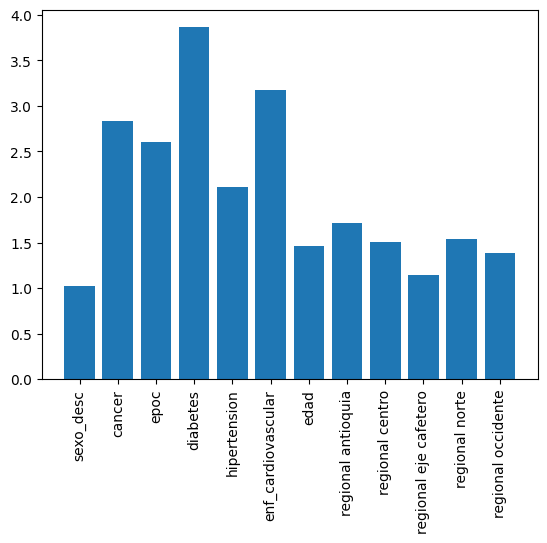

In [137]:
#Se procede a realizar una grafica para visualizar el numero de features a seleccionar 
pesos = dicscore.values()
valores = range(len(pesos))
plt.bar(x=valores,height=pesos)
plt.xticks(valores, dicscore.keys(), rotation = 90)
plt.show()

In [138]:
df1

,sexo_desc,cancer,epoc,diabetes,hipertension,enf_cardiovascular,precio,edad,regional antioquia,regional centro,regional eje cafetero,regional norte,regional occidente
0,0,0,0,0,0,0,0.000409,0.405660,1,0,0,0,0
1,0,0,0,0,0,0,0.000070,0.528302,0,1,0,0,0
2,0,1,0,1,1,0,0.029819,0.745283,0,1,0,0,0
3,1,0,0,0,0,0,0.001928,0.415094,0,1,0,0,0
4,0,0,0,0,0,0,0.000925,0.528302,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121127,1,0,0,0,0,0,0.001754,0.141509,1,0,0,0,0
121128,1,0,0,0,0,0,0.000331,0.056604,0,0,0,1,0
121129,0,0,0,0,0,0,0.000210,0.141509,1,0,0,0,0
121130,0,0,0,0,0,0,0.002915,0.311321,0,0,0,0,1


Selección del modelo

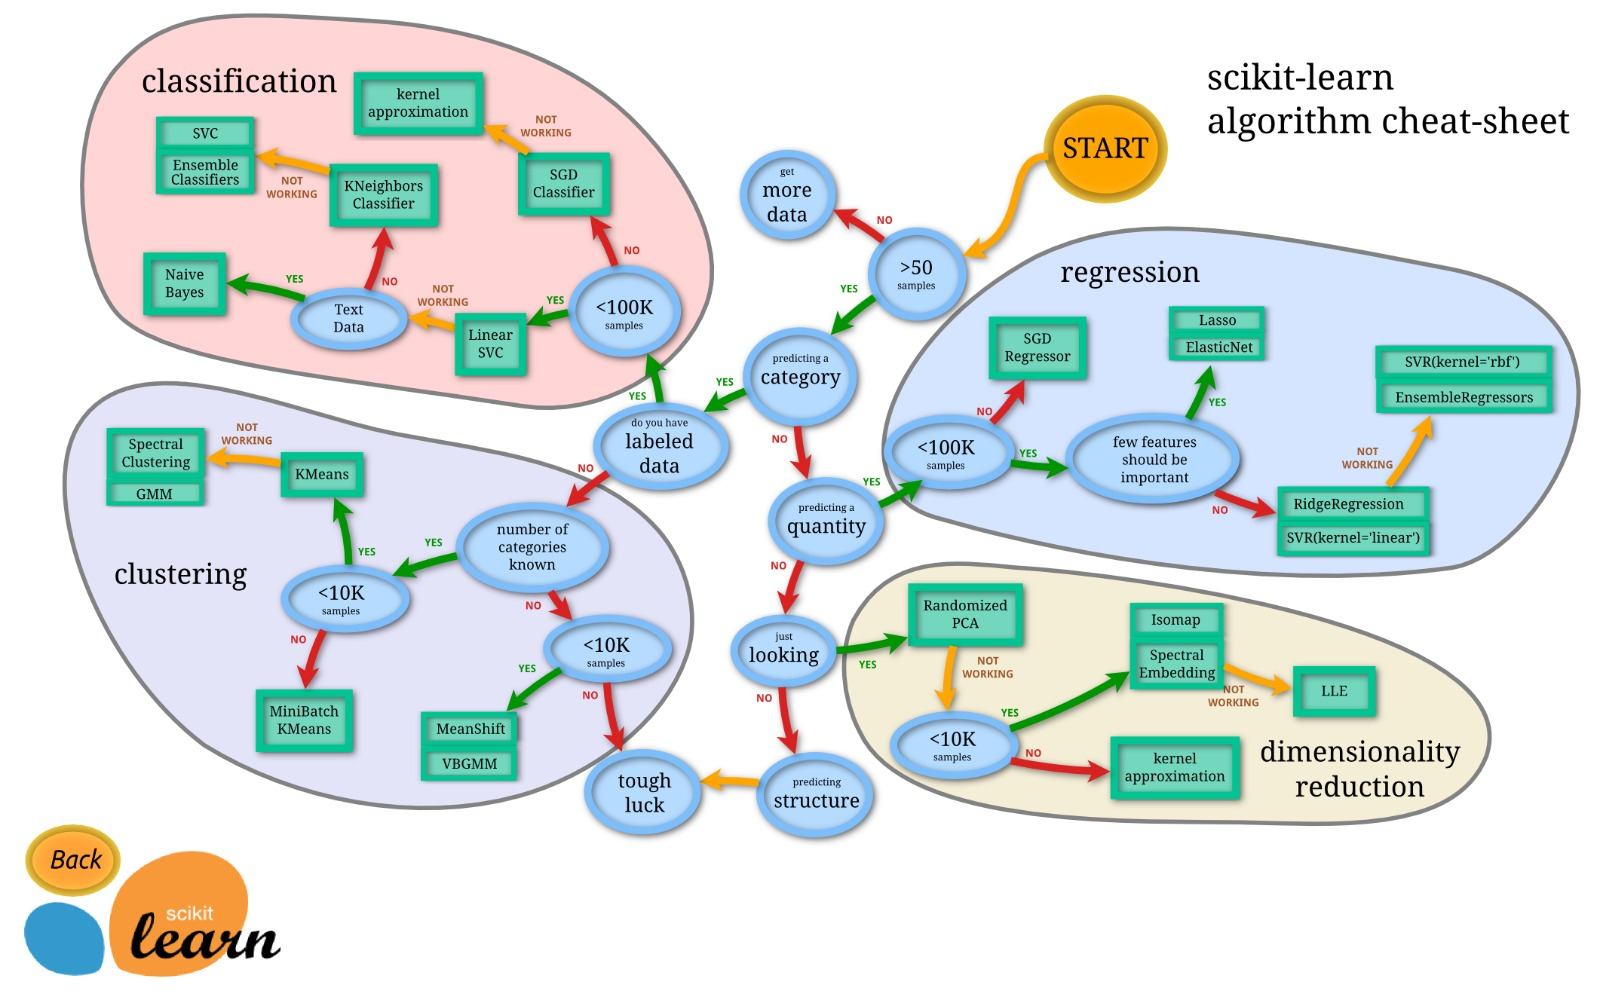

In [139]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [140]:
# Crear el modelo de regresión con SGDRegressor
model1 = SGDRegressor(max_iter=1000, tol=1e-3)

# Entrenar el modelo
model1.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = model1.predict(X_test)
# Calcular métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 score:", r2)

MSE: 6.712799071507703e-05
RMSE: 0.008193167318874735
MAE: 0.001918670392093248
R2 score: 0.023235881543725023


In [141]:
# Crear el modelo 2 de regresión con SGDRegressor
model2 = SGDRegressor(max_iter=50, tol=1e-3)

# Entrenar el modelo
model2.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred2 = model2.predict(X_test)

# Calcular métricas de desempeño
mse = mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 score:", r2)


MSE: 6.714385016579637e-05
RMSE: 0.008194135107855884
MAE: 0.0019770466698457332
R2 score: 0.023005114284999406


In [142]:
# Inicializar el modelo RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Entrenar el modelo
rf_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred3 = rf_regressor.predict(X_test)

# Calcular métricas de desempeño
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

In [143]:
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 score:", r2)

MSE: 7.471091108365582e-05
RMSE: 0.00864354736688912
MAE: 0.0019800454310372
R2 score: -0.08710146730642365


In [144]:
from sklearn.linear_model import Ridge

In [145]:
# Crear el modelo de Regresión Ridge
model = Ridge(alpha=1.0)  

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Imprimir el MSE
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 score:", r2)



MSE: 6.711570621462008e-05
RMSE: 0.008192417604994272
MAE: 0.001880977172060055
R2 score: 0.023414630514633994


In [146]:
# Crear el modelo de regresión lineal
regression = LinearRegression()

# Entrenar el modelo utilizando los datos de entrenamiento
regression.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = regression.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Error cuadrático medio (MSE):', mse)
print('Coeficiente de determinación (R^2):', r2)

Error cuadrático medio (MSE): 6.711533463265925e-05
Coeficiente de determinación (R^2): 0.023420037319195397


Guardar modelo

In [148]:
# Se guarda el modelo como archivo binario
nombreArchivo = "./modelo.pkl"
pickle.dump(model2, open(nombreArchivo, 'wb'))